In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.visualization.projections import scatter_spec
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

In [4]:
datasets = list(DATA_DIR.glob('embeddings/0.5/*/*.pickle'))
datasets = pd.DataFrame([[i.parent.stem, i.stem, i] for i in datasets], columns = ['ds', 'indv', '_loc'])
mask = np.array([i[:3] == '0.5' for i in datasets.indv.values])
datasets = datasets[mask]
datasets['indv'] = np.array([i[4:] for i in datasets.indv.values])
datasets[:3]

,ds,indv,_loc
1,castellucci_mouse_usv_segmented,VOC597,/local/home/tsainbur/github_repos/avgn_paper/d...
3,castellucci_mouse_usv_segmented,VOC592,/local/home/tsainbur/github_repos/avgn_paper/d...
4,castellucci_mouse_usv_segmented,VOC591,/local/home/tsainbur/github_repos/avgn_paper/d...


In [5]:
datasets.ds.unique()

array(['castellucci_mouse_usv_segmented', 'BIRD_DB_Vireo_cassinii',
       'gibbon_morita_segmented', 'bengalese_finch_sober',
       'batsong_segmented', 'BIRD_DB_Toxostoma_redivivum', 'buckeye',
       'swamp_sparrow', 'mobysound_humpback_whale',
       'koumura_bengalese_finch', 'katahira_white_munia_segmented',
       'canary_segmented', 'zebra_finch_gardner_segmented', 'giant_otter',
       'european_starling_gentner_segmented'], dtype=object)

In [6]:
ds = 'katahira_white_munia_segmented'
ds_loc = datasets[datasets.ds == ds].iloc[5]._loc
ds_loc

PosixPath('/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/0.5/katahira_white_munia_segmented/0.5_WM21.pickle')

In [7]:
syllable_df = pd.read_pickle(ds_loc)

In [8]:
syllable_df[:3]

,start_time,end_time,indv,indvi,key,rate,spectrogram,umap
0,0.510,0.552,WM21,0,WM21_1,48000,"[[0, 0, 0, 0, 0, 0, 6, 8, 0, 0, 0, 0, 0, 0, 0,...","[-1.8919363021850586, -0.8934911489486694]"
1,0.554,0.566,WM21,0,WM21_1,48000,"[[0, 0, 0, 0, 0, 0, 0, 6, 0, 5, 6, 0, 13, 49, ...","[-2.046267032623291, 1.5480445623397827]"
2,1.476,1.488,WM21,0,WM21_1,48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 13, 0...","[-1.7907758951187134, 1.8121284246444702]"


In [9]:
specs = np.stack(syllable_df['spectrogram'].values)

In [10]:
np.shape(specs)

(2542, 32, 22)

In [11]:
embedding = np.vstack(syllable_df['umap'].values)

In [12]:
np.shape(embedding)

(2542, 2)

(-15, 15)

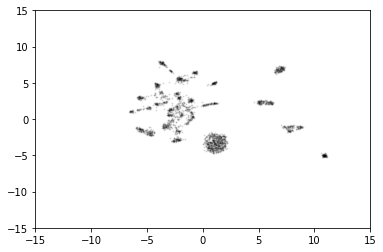

In [13]:
fig, ax = plt.subplots()
ax.scatter(embedding[:,0], embedding[:,1], s=1, color='k', alpha = 0.1)
ax.set_xlim([-15,15])
ax.set_ylim([-15,15])

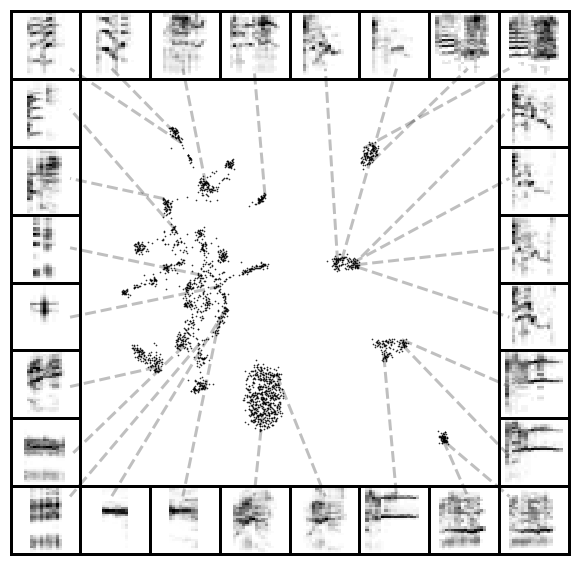

In [16]:
nex = -1
scatter_spec(
    embedding[:nex],
    specs[:nex],
    column_size=8,
    #x_range = [-4.5,4],
    #y_range = [-4.5,5.5],
    pal_color="hls",
    color_points=False,
    enlarge_points=0,
    figsize=(10, 10),
    range_pad = 0.15,
    scatter_kwargs = {
        #'labels': syllable_df.phrase.values[:nex],
        'alpha':0.75,
        's': 0.5,
        'show_legend': False
    },
    matshow_kwargs = {
        'cmap': plt.cm.Greys
    },
    line_kwargs = {
        'lw':3,
        'ls':"dashed",
        'alpha':0.25,
    },
    draw_lines=True,
    n_subset= 1000,
    border_line_width = 3,

);
save_fig(FIGURE_DIR / 'discrete_umap' / ds, dpi=300, save_jpg=True, save_png=True)